In [21]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

C:\Users\Ankit\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


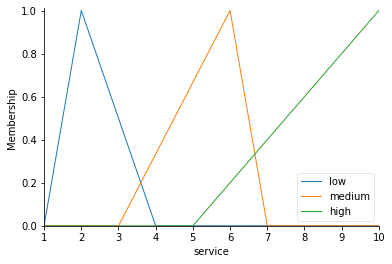

In [22]:
# fuzzy system for generating tip
service=ctrl.Antecedent(np.arange(1,11,1),"service")
service['low']=fuzzy.trimf(service.universe,[1,2,4])
service['medium']=fuzzy.trimf(service.universe,[3,6,7])
service['high']=fuzzy.trimf(service.universe,[5,10,10])

service.view()
plt.show()

C:\Users\Ankit\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


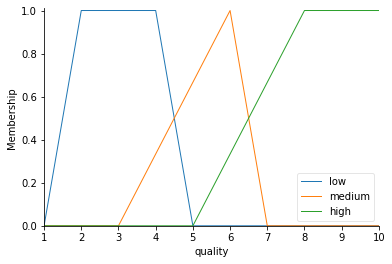

In [23]:
# fuzzy system for generating tip
quality=ctrl.Antecedent(np.arange(1,11,1),"quality")
quality['low']=fuzzy.trapmf(quality.universe,[1,2,4,5])
quality['medium']=fuzzy.trimf(quality.universe,[3,6,7])
quality['high']=fuzzy.trapmf(quality.universe,[5,8,10,10])

quality.view()
plt.show()

C:\Users\Ankit\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


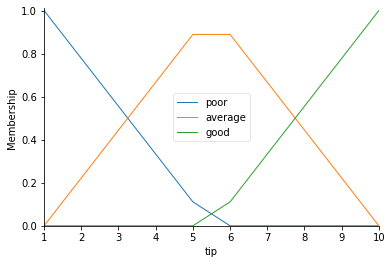

In [24]:
tip=ctrl.Consequent(np.arange(1,11,1),"tip")
# quality['low']=fuzzy.trapmf(quality.universe,[1,2,4,5])
# quality['medium']=fuzzy.trimf(quality.universe,[3,6,7])
# quality['high']=fuzzy.trapmf(quality.universe,[5,8,10,10])

tip.automf(3)


tip.view()
plt.show()

In [25]:
# rules
rule1=ctrl.Rule(service['high']&quality['high'],tip['good'])
rule2=ctrl.Rule(service['low']&quality['high'],tip['average'])
rule3=ctrl.Rule(service['low']&quality['low'],tip['poor'])
rules=[rule1,rule2,rule3]

In [26]:
x=ctrl.ControlSystem(rules)
y=ctrl.ControlSystemSimulation(x)

In [27]:
y.input['service']=2
y.input['quality']=8
y.compute()

In [28]:
print(y.output['tip'])

5.500000000000001


C:\Users\Ankit\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


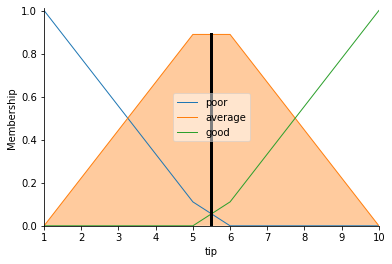

In [29]:
tip.view(sim=y)
plt.show()